In [10]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns


In [11]:
school_csr_df = pd.read_csv("Raw_Data/LA_cities_school_ranking.csv",encoding = "ISO-8859-1")
#zipcodes_df = zipcodes_df.rename(columns={"zip": "Zipcode","County":"City"})

school_csr_df.head()

,CITY,SCHOOL_RAW,SCHOOL,CSR
0,Alhambra,Alhambra High CSR rank: 8,Alhambra High,8
1,Alhambra,Century High CSR rank: 3,Century High,3
2,Alhambra,Emery Park Elementary CSR rank: 7,Emery Park Elementary,7
3,Alhambra,Fremont Elementary CSR rank: 5,Fremont Elementary,5
4,Alhambra,Garfield Elementary CSR rank: 8,Garfield Elementary,8


In [12]:
#Filter only selected cities for analysis
selected_cities=['Alhambra','Burbank','Inglewood','Glendale','Long Beach','Los Angeles','Palmdale','Pasadena','Santa Clarita','Torrance']
school_csr_df=school_csr_df[school_csr_df['CITY'].isin(selected_cities)]
school_csr_df

,CITY,SCHOOL_RAW,SCHOOL,CSR
0,Alhambra,Alhambra High CSR rank: 8,Alhambra High,8
1,Alhambra,Century High CSR rank: 3,Century High,3
2,Alhambra,Emery Park Elementary CSR rank: 7,Emery Park Elementary,7
3,Alhambra,Fremont Elementary CSR rank: 5,Fremont Elementary,5
4,Alhambra,Garfield Elementary CSR rank: 8,Garfield Elementary,8
5,Alhambra,Granada Elementary CSR rank: 5,Granada Elementary,5
6,Alhambra,Alternative Independence High CSR rank: 3,Alternative Independence High,3
7,Alhambra,Marguerita Elementary CSR rank: 7,Marguerita Elementary,7
8,Alhambra,Mark Keppel High CSR rank: 10,Mark Keppel High,10
9,Alhambra,Martha Baldwin Elementary CSR rank: 9,Martha Baldwin Elementary,9


In [13]:
#Group by City, aggregation average by Gini index

city_csr_df = school_csr_df.groupby(["CITY"])['CSR'].agg(['mean']).sort_index().reset_index()
city_csr_df= city_csr_df.rename(columns={"mean":"CSR_AVG"})

city_csr_df=city_csr_df.sort_values(by='CSR_AVG', ascending=True)
city_csr_df

,CITY,CSR_AVG
3,Inglewood,3.419355
6,Palmdale,3.550000
5,Los Angeles,4.316306
7,Pasadena,4.461538
4,Long Beach,5.563380
0,Alhambra,6.769231
2,Glendale,7.250000
1,Burbank,7.388889
8,Santa Clarita,7.818182
9,Torrance,8.090909


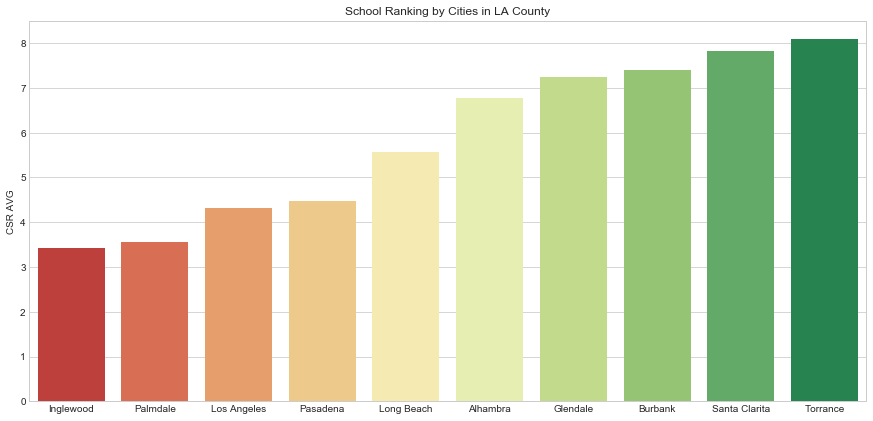

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
sns.barplot(x="CITY", y="CSR_AVG", data=city_csr_df, palette=sns.color_palette("RdYlGn", 10))

plt.xlabel("")
plt.ylabel("CSR AVG")
plt.title("School Ranking by Cities in LA County")

# Save the figure
plt.savefig("Clean_Data/School_Ranking_by_City.png")